In [1]:
import tensorflow as tf
import tensorflow_hub as hub
# import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [2]:
module_url = "tf_sent_encoder_2" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]

In [3]:
# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)
# Compute a representation for each message, showing various lengths supported.
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
# logging.set_verbosity(logging.ERROR)

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    message_embeddings = session.run(embed(messages))

    for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
        print("Message: {}".format(messages[i]))
        print("Embedding size: {}".format(len(message_embedding)))
        message_embedding_snippet = ", ".join(
            (str(x) for x in message_embedding[:3]))
        print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
Message: Elephant
Embedding size: 512
Embedding: [-0.016987269744277, -0.00894981063902378, -0.007062731310725212, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.03531336411833763, -0.02538427710533142, -0.007880028337240219, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [0.01879093237221241, 0.04536518454551697, -0.020010896027088165, ...]



In [4]:
def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=0.8)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")


def run_and_plot(session_, input_tensor_, messages_, encoding_tensor):
    message_embeddings_ = session_.run(
      encoding_tensor, feed_dict={input_tensor_: messages_})
    plot_similarity(messages_, message_embeddings_, 90)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


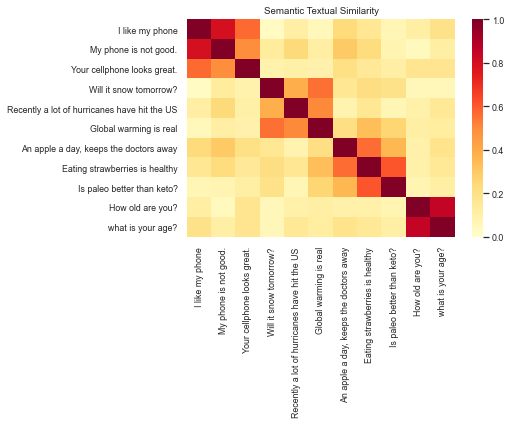

In [5]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    session.run(tf.tables_initializer())
    run_and_plot(session, similarity_input_placeholder, messages,
               similarity_message_encodings)

In [6]:
# similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
# similarity_message_encodings = embed(similarity_input_placeholder)
session = tf.Session()
session.run(tf.global_variables_initializer())
session.run(tf.tables_initializer())   

In [7]:
emb = session.run(similarity_message_encodings, {similarity_input_placeholder: messages})
print (emb)

[[ 8.30300711e-03 -1.87648367e-02 -1.28177013e-02 ... -5.95349120e-03
  -5.86720146e-02 -6.75342530e-02]
 [ 5.09722158e-02 -2.06033997e-02 -2.83946935e-02 ...  3.70367670e-05
  -6.76677078e-02 -4.42407876e-02]
 [-9.22654872e-04 -8.62088278e-02 -1.76287182e-02 ... -4.13700007e-03
  -2.75725480e-02 -8.46707225e-02]
 ...
 [ 3.77785899e-02 -9.21663921e-03 -4.72149625e-02 ...  4.31345813e-02
  -4.44794521e-02  2.33076587e-02]
 [-7.02297837e-02 -3.00867297e-02  1.49307195e-02 ...  4.26201224e-02
  -2.52771936e-02  4.05659489e-02]
 [-8.76307860e-02 -4.67088707e-02 -2.78719841e-03 ...  2.69895070e-03
  -5.93369864e-02  4.28797565e-02]]


In [8]:
print (np.inner(emb, emb))

[[0.9999999  0.79836744 0.56905735 0.02889453 0.11756774 0.05235888
  0.2340768  0.16352592 0.0659157  0.10981686 0.19214164]
 [0.79836744 0.9999997  0.49622822 0.13574757 0.24164268 0.12073169
  0.2975064  0.22691867 0.07746202 0.04098704 0.11251613]
 [0.56905735 0.49622822 1.0000005  0.09357406 0.10283311 0.09549135
  0.20687051 0.15031922 0.11031282 0.1780014  0.17297542]
 [0.02889453 0.13574757 0.09357406 1.0000001  0.38348013 0.55487835
  0.16328713 0.21761805 0.19398257 0.05735747 0.05552402]
 [0.11756774 0.24164268 0.10283311 0.38348013 0.99999976 0.5049952
  0.08307707 0.16043606 0.06283487 0.10071236 0.15364978]
 [0.05235888 0.12073169 0.09549135 0.55487835 0.5049952  0.99999976
  0.21454383 0.33264312 0.2556779  0.11197532 0.12510024]
 [0.2340768  0.2975064  0.20687051 0.16328713 0.08307707 0.21454383
  1.         0.56335807 0.35651165 0.10093664 0.1866653 ]
 [0.16352592 0.22691867 0.15031922 0.21761805 0.16043606 0.33264312
  0.56335807 0.99999917 0.61031306 0.0992652  0.154

In [9]:
sentences_ = '''I need daily rations in Attur
Give rice, dal oil
people are hungary 
provide rations for 6 people for 10 days
Need prepared food for 20 people in slum
Need groceries for a family in quarantine
my sugar, eggs and milk are over. I have small chidren. 
Need food packets for 20 people
Need food for diabeties patient
I want bread and rice for my home
Two people suffering from fever and cold 
Pregnant lady needs help
I need to take my father to hospital for dialysis. Please arrange transport.
Equipment required at hospital
people need mask and sanitizers
Need an ambulance urgently
An old man needs doctor
accident in the area need doctor
arm broken need to go to hospital
food poisoning by eating old distributed food
5 people trapped with no internet in whitefield
requesting mobile recharge for 2 phones
network coverage is weak in hsr
no connectivity. Need help.
I am not able to call helplines
my phone is damaged. Requesting spare
is it possible to deliver a phone in kormangla as mine is not working
sim card issue. No shops open
network tower broken down in whitefield
calls are not connecting from airtel
I want to travel back to my native place. Any help would be appreciated
No nearby grocery store need urgent transport help.
Want curfew pass for case of emergency travel.
Firstline workers facing issues as no cabs are available
Want to go back to my family place. Currently staying in the hotel.
Want to travel from bangalore to delhi. Any means of transport available?
Residing in green zone but not able to get travel permssion even for getting essential household items.
Few days back my vehicle was seized by police ,now don't have any means of transport for getting groceries.
I am a doctor, my car brokedown and want it to get repaired urgently.
My visa about to get expire. Want some travel arrangements to be done to fly back to Austia.
I can hear voices of crying children from my neighbor. I think they are being abused.
Yesterday i saw few people bullying a person from my locality. I think he needs help.
Was passing by the vathur bus stop and a group of boys teased me.. Urgently help
I feel that someone is going to break in and kill me. HELP
The only shop in my area is charging very high prices for items.
An old man is getting abused by his family
Someone is continusly following me.Feeling scared.
I am not able to contact my friend from past few days.I think his life is in danger.
My neighbor attempted suicide .She is in hospital right now ,urgent help needed
I saw bruises on my maid face. I think she is a victim of domestic violence.'''

In [8]:
sentences = sentences_.split('\n')

In [9]:
labelled_sent = [(0, s) for s in sentences[:10]] + [(1, s) for s in sentences[10:20]] + [(2, s) for s in sentences[20:30]] + [(3, s) for s in sentences[30:40]] + [(4, s) for s in sentences[40:50]]
print (labelled_sent)

[(0, 'I need daily rations in Attur'), (0, 'Give rice, dal oil'), (0, 'people are hungary '), (0, 'provide rations for 6 people for 10 days'), (0, 'Need prepared food for 20 people in slum'), (0, 'Need groceries for a family in quarantine'), (0, 'my sugar, eggs and milk are over. I have small chidren. '), (0, 'Need food packets for 20 people'), (0, 'Need food for diabeties patient'), (0, 'I want bread and rice for my home'), (1, 'Two people suffering from fever and cold '), (1, 'Pregnant lady needs help'), (1, 'I need to take my father to hospital for dialysis. Please arrange transport.'), (1, 'Equipment required at hospital'), (1, 'people need mask and sanitizers'), (1, 'Need an ambulance urgently'), (1, 'An old man needs doctor'), (1, 'accident in the area need doctor'), (1, 'arm broken need to go to hospital'), (1, 'food poisoning by eating old distributed food'), (2, '5 people trapped with no internet in whitefield'), (2, 'requesting mobile recharge for 2 phones'), (2, 'network cov

In [21]:
for ls in labelled_sent:
    print (str(ls[0]) +',' + ls[1])

0,I need daily rations in Attur
0,Give rice, dal oil
0,people are hungary 
0,provide rations for 6 people for 10 days
0,Need prepared food for 20 people in slum
0,Need groceries for a family in quarantine
0,my sugar, eggs and milk are over. I have small chidren. 
0,Need food packets for 20 people
0,Need food for diabeties patient
0,I want bread and rice for my home
1,Two people suffering from fever and cold 
1,Pregnant lady needs help
1,I need to take my father to hospital for dialysis. Please arrange transport.
1,Equipment required at hospital
1,people need mask and sanitizers
1,Need an ambulance urgently
1,An old man needs doctor
1,accident in the area need doctor
1,arm broken need to go to hospital
1,food poisoning by eating old distributed food
2,5 people trapped with no internet in whitefield
2,requesting mobile recharge for 2 phones
2,network coverage is weak in hsr
2,no connectivity. Need help.
2,I am not able to call helplines
2,my phone is damaged. Requesting spare
2,is it pos

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import re

df = pd.DataFrame(columns=['label','text'])
trainset = datasets.load_files(container_path = 'aabhas/dataset_small_less_categories',encoding = 'UTF-8')

def get_dataframe(lines):
#     lines = filename.splitlines()
    data = []
    for i in range(0, len(lines)):
        label = lines[i][0]
    #     label = label.split(",")[0]
        text = ' '.join(lines[i][1:])
        text = re.sub(',','', text)
        data.append([label, text])
    df = pd.DataFrame(data, columns=['label', 'text'])
    df.label = df.label.astype('category')
    return df

for k in range(len(trainset.target)):
    labelled_sent= trainset.data[k].strip().split('\r\n')
    Label=[trainset.target[k]]*len(labelled_sent)
    labelled_emb = list(zip([s for s in Label], [s for s in labelled_sent]))
    df_train = get_dataframe(labelled_emb)
    df=pd.concat([df,df_train])
    df.reset_index(inplace=True, drop=True)

In [4]:
df

,label,text
0,2,Two people suffering from fever and cold
1,2,I need to take my father to hospital for dialy...
2,2,Equipment required at hospital. patients need ...
3,2,Need an ambulance urgently
4,2,accident in the area and arm broken need to go...
...,...,...
308,4,Leave the future benefits and look at the pres...
309,4,Lufthansa prepares to resume flights to Canada...
310,4,Mam I'm migrant worker of uttrakhand stuck in ...
311,4,Many travelers are still waiting to get back t...


In [15]:
df[['label', 'text']].values.tolist()

[[2, 'Two people suffering from fever and cold'],
 [2, 'I need to take my father to hospital for dialysis.'],
 [2, 'Equipment required at hospital. patients need mask and sanitizers'],
 [2, 'Need an ambulance urgently'],
 [2, 'accident in the area and arm broken need to go to hospital'],
 [2,
  'The delivery workers of essential items should always wear masks as they come in contact with hundreds of people. Government should provide masks for them.'],
 [2, 'My blood pressure is low.'],
 [2, 'food poisoning by eating old distributed food'],
 [2,
  'I am hungry from last three days. My glucose level is very low and bp is very high. Need help urgently.'],
 [2,
  'I was travelling from karnataka to tamil nadu and met with an accident. My bike is broken and I need medical assistance for my fractured leg.'],
 [2, 'my daughter ate expired medicine. I am unable to call any hospital.'],
 [2,
  'my aunt is feeling uneasiness since morning. This can be a symptom of corona. Send check up team imme

In [17]:
def read_sentences(sentences_path):
    labelled_sent = []
    with open(sentences_path, 'r') as f:
        f.seek(0)
        for line in f:
            if line.strip():
                labelled_sent.append(tuple(line.strip().split(',')))
    return labelled_sent

def read_sentences_from_df(df):
    return df[['label', 'text']].values.tolist()
    
#test_sent = read_sentences('sentences.txt')
test_sent = read_sentences_from_df(df)
print (test_sent)

[[2, 'Two people suffering from fever and cold'], [2, 'I need to take my father to hospital for dialysis.'], [2, 'Equipment required at hospital. patients need mask and sanitizers'], [2, 'Need an ambulance urgently'], [2, 'accident in the area and arm broken need to go to hospital'], [2, 'The delivery workers of essential items should always wear masks as they come in contact with hundreds of people. Government should provide masks for them.'], [2, 'My blood pressure is low.'], [2, 'food poisoning by eating old distributed food'], [2, 'I am hungry from last three days. My glucose level is very low and bp is very high. Need help urgently.'], [2, 'I was travelling from karnataka to tamil nadu and met with an accident. My bike is broken and I need medical assistance for my fractured leg.'], [2, 'my daughter ate expired medicine. I am unable to call any hospital.'], [2, 'my aunt is feeling uneasiness since morning. This can be a symptom of corona. Send check up team immediately.'], [2, 'I 

In [18]:
labelled_emb = list(zip([s[0] for s in labelled_sent], session.run(embed([s[1] for s in labelled_sent]))))

NameError: name 'session' is not defined

In [8]:
print (len(labelled_emb))

NameError: name 'labelled_emb' is not defined

In [86]:
np.inner(labelled_emb[0][1], labelled_emb[30][1])

0.28796053

In [87]:
labelled_emb[1][0]

0

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


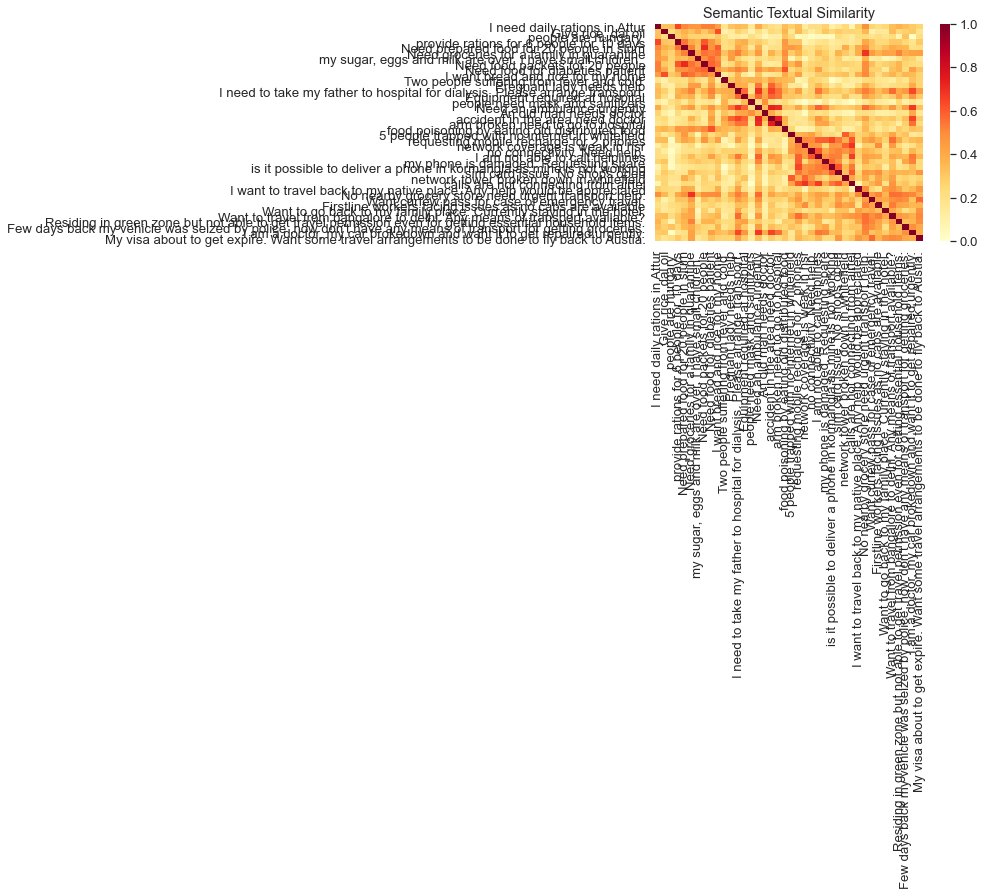

In [74]:
similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
run_and_plot(session, similarity_input_placeholder, sentences, similarity_message_encodings)


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


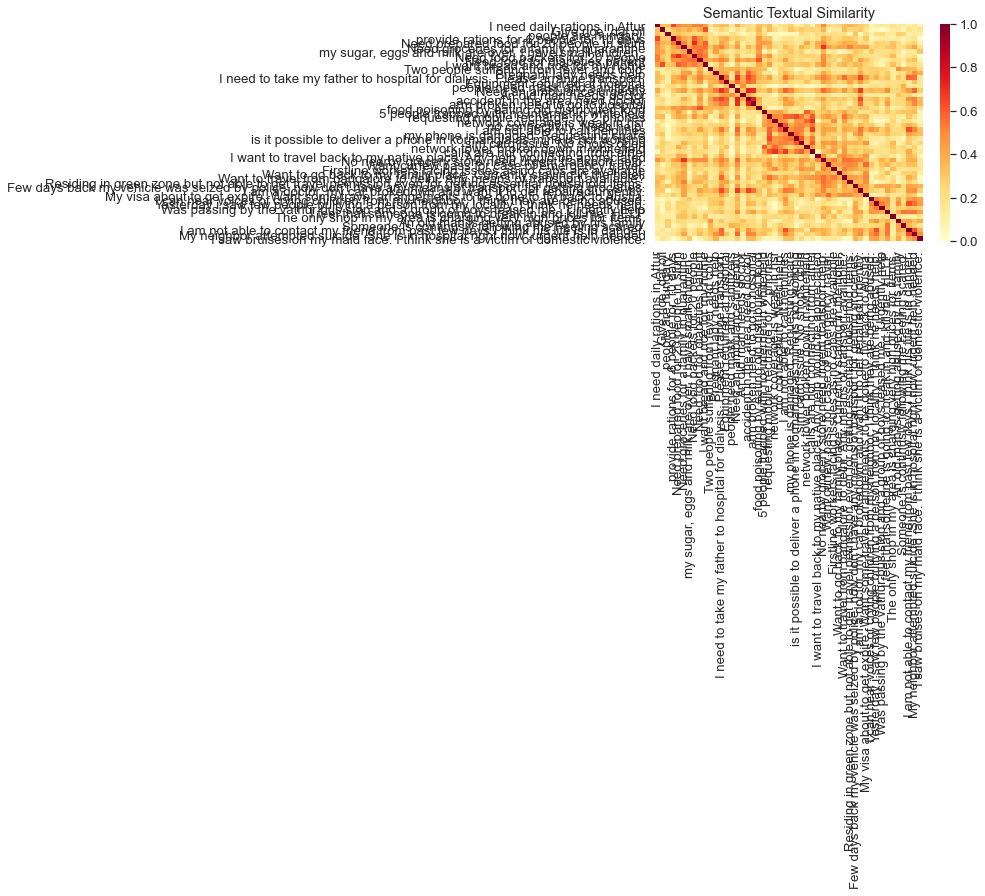

In [88]:
similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
run_and_plot(session, similarity_input_placeholder, sentences, similarity_message_encodings)


In [28]:
query = 'blood sugar level low. need help'
q_emb = session.run(embed([query]))
similarities = np.inner(q_emb, [e[1] for e in labelled_emb])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [29]:
print (similarities)
label_similarities = [(e[0], e[1], s) for e, s in zip(labelled_sent, similarities[0])]

[[0.40007234 0.29063833 0.21692601 0.323508   0.34919208 0.33689982
  0.53196657 0.36973077 0.73987514 0.2896032  0.35393918 0.48883992
  0.4594999  0.39152226 0.1063226  0.5228839  0.33689386 0.4718516
  0.45328766 0.4768602  0.14023536 0.28487435 0.26250404 0.3571505
  0.50906587 0.26897115 0.22815105 0.2403083  0.19999072 0.23964003
  0.2358006  0.3605466  0.24782103 0.27978945 0.08784772 0.27895808
  0.26710945 0.26541823 0.4322462  0.282354   0.29184943 0.26420358
  0.22173887 0.24834888 0.1711239  0.26246807 0.20805344 0.3455972
  0.36164352 0.27537403]]


In [30]:
sorted(label_similarities, key=lambda x: x[2], reverse=True)

[(0, 'Need food for diabeties patient', 0.73987514),
 (0, 'my sugar, eggs and milk are over. I have small chidren. ', 0.53196657),
 (1, 'Need an ambulance urgently', 0.5228839),
 (2, 'I am not able to call helplines', 0.50906587),
 (1, 'Pregnant lady needs help', 0.48883992),
 (1, 'food poisoning by eating old distributed food', 0.4768602),
 (1, 'accident in the area need doctor', 0.4718516),
 (1,
  'I need to take my father to hospital for dialysis. Please arrange transport.',
  0.4594999),
 (1, 'arm broken need to go to hospital', 0.45328766),
 (3,
  'I am a doctor, my car brokedown and want it to get repaired urgently.',
  0.4322462),
 (0, 'I need daily rations in Attur', 0.40007234),
 (1, 'Equipment required at hospital', 0.39152226),
 (0, 'Need food packets for 20 people', 0.36973077),
 (4,
  'My neighbor attempted suicide .She is in hospital right now ,urgent help needed',
  0.36164352),
 (3, 'No nearby grocery store need urgent transport help.', 0.3605466),
 (2, 'no connectivity

In [16]:
from sklearn.neighbors import KNeighborsClassifier
nclf = KNeighborsClassifier(n_neighbors=5)
labels, emb = tuple(zip(*labelled_emb))
nclf.fit(emb, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
nclf.predict(q_emb)

array([3])

In [19]:
q_emb.shape

(1, 512)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import re
import spacy

df = pd.DataFrame(columns=['label','text'])
trainset = datasets.load_files(container_path = 'aabhas/dataset_small_less_categories',encoding = 'UTF-8')

def get_dataframe(lines):
#     lines = filename.splitlines()
    data = []
    for i in range(0, len(lines)):
        label = lines[i][0]
    #     label = label.split(",")[0]
        text = ' '.join(lines[i][1:])
        text = re.sub(',','', text)
        data.append([label, text])
    df = pd.DataFrame(data, columns=['label', 'text'])
    df.label = df.label.astype('category')
    return df

for k in range(len(trainset.target)):
    labelled_sent= trainset.data[k].strip().split('\r\n')
    Label=[trainset.target[k]]*len(labelled_sent)
    labelled_emb = list(zip([s for s in Label], [s for s in labelled_sent]))
    df_train = get_dataframe(labelled_emb)
    df=pd.concat([df,df_train])
    df.reset_index(inplace=True, drop=True)

In [17]:
nlp = spacy.load("en_core_web_sm")
filter_POS = set(['NOUN', 'NUM', 'ADJ', 'VERB', 'PART'])
# ADV, NOUN, ADP, PRON, SCONJ, PROPN, DET, SYM, INTJ
# PUNCT, NUM, AUX, X, CONJ, ADJ, VERB, PART, SPACE, CCONJ
# def filter_query(query):
#     query = query.lower()
#     doc = nlp(query)
#     tokens = [t.text for t in doc if t.pos_ in filter_POS]
#     return ' '.join(tokens)

def filter_query(query):
    query = query.lower()
    # trans = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    # query = query.translate(trans)
    query = re.sub(r'\W+', ' ', query)
    # print (query)
    doc = nlp(query)
    # print ([(t.text,t.pos_) for t in doc])
    tokens = [t.text for t in doc if t.pos_ in filter_POS]
    return ' '.join(tokens)

def run_prediction(query_list):
    filt_query = [filter_query(q) for q in query_list]
    print (filt_query)
    # filt_query = query_list
    emb_arr = session.run(embedder_result, feed_dict={text_input: filt_query})
    return emb_arr


In [13]:
df['text_'] = df['text']
df['text'] = df['text'].apply(filter_query)

In [14]:
for i in range(df.shape[0]):
    if 'dsouza' in df['text'][i]:
        print (i)

33


In [15]:
df.text_[33]

'faye dsouza please see migrants and others staying in sant Nagar/ garhi/ prakash mohalla east of Kailash need help. There are many without food ration medicines in the area. Request you to please ask NGO/people to help them with basic. '

In [20]:
def read_sentences(sentences_path):
    labelled_sent = []
    with open(sentences_path, 'r') as f:
        f.seek(0)
        for line in f:
            if line.strip():
                labelled_sent.append(tuple(line.strip().split(',')))
    return labelled_sent

def read_sentences_from_df(df):
    return df[['label', 'text']].values.tolist()
    
#test_sent = read_sentences('sentences.txt')
test_sent = read_sentences_from_df(df)
print (test_sent)

[[2, 'Two people suffering from fever and cold'], [2, 'I need to take my father to hospital for dialysis.'], [2, 'Equipment required at hospital. patients need mask and sanitizers'], [2, 'Need an ambulance urgently'], [2, 'accident in the area and arm broken need to go to hospital'], [2, 'The delivery workers of essential items should always wear masks as they come in contact with hundreds of people. Government should provide masks for them.'], [2, 'My blood pressure is low.'], [2, 'food poisoning by eating old distributed food'], [2, 'I am hungry from last three days. My glucose level is very low and bp is very high. Need help urgently.'], [2, 'I was travelling from karnataka to tamil nadu and met with an accident. My bike is broken and I need medical assistance for my fractured leg.'], [2, 'my daughter ate expired medicine. I am unable to call any hospital.'], [2, 'my aunt is feeling uneasiness since morning. This can be a symptom of corona. Send check up team immediately.'], [2, 'I 

In [21]:
class_dict = {i: c for i, c in enumerate(trainset.target_names)}
print (class_dict)

{0: 'communication', 1: 'food', 2: 'healthcare', 3: 'others', 4: 'travel'}


In [50]:
# class_dict = {'0': 'Food', '1': 'Health', '2': 'Connectivity', '3': 'Transport', '4': 'Abuse'}
# class_dict = {i, c in enumerate(trainset.target_names)}

def read_sentences(sentences_path):
    labelled_sent = []
    with open(sentences_path, 'r') as f:
        f.seek(0)
        for line in f:
            if line.strip():
                labelled_sent.append(tuple(line.strip().split(',')))
    return labelled_sent

labelled_sent = read_sentences_from_df(df)

module_path = 'tf_sent_encoder_2'
g = tf.Graph()
with g.as_default():
    text_input = tf.placeholder(dtype=tf.string, shape=[None])
    embed = hub.Module(module_path)
    embedder_result = embed(text_input)
    init_op = tf.group([tf.global_variables_initializer(), tf.tables_initializer()])
g.finalize()

session = tf.Session(graph=g)
session.run(init_op)

labelled_emb = list(zip([s[0] for s in labelled_sent], session.run(embedder_result, feed_dict={text_input: [s[1] for s in labelled_sent]})))


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [51]:
query = "These are the contact details of a group of 50 plus migrant workers stuck in KR market with only intermittent access to food. They say they are a large group and all of them are unable to get food even at distribution points as food runs out. Request you to help"
q_emb = run_prediction([query])
#session.run(embedder_result, feed_dict={text_input: [query]})
similarities = np.inner(q_emb, [e[1] for e in labelled_emb])

['contact details group 50 migrant workers stuck market only intermittent access food say large group unable to food distribution points food runs request to help']


In [24]:
label_similarities = [(e[0], e[1], s) for e, s in zip(labelled_sent, similarities[0])]

In [25]:
sorted(label_similarities, key=lambda x: x[2], reverse=True)

[(1,
  'Stop Covid19 crisis morphing into a Food Crisis: Support to Africa rice sector. To avoid food crisis in Africa urgent measures for sustained agricultural growth need to be in place now',
  0.60467327),
 (1,
  'Today we organized a virtual event on food security and nutrition looking at responses & early results to avert a global crisis.',
  0.588662),
 (1, 'Need prepared food for 20 people in slum', 0.58797956),
 (1,
  'New survey finds food waste on the rise as takeout and delivery increases.',
  0.57638055),
 (4,
  'Hello kind people plz help @Deeksha01535151 in raising funds for migrant workers stuck in Delhi. Contribute whatever you can no amount is small.',
  0.5755189),
 (1,
  'I urge to help me in getting food to 20 migrant workers stuck in Regonda P/S Sundhrala Tehsil Husnabad District Siddipet . This is their contact: Asif Hussain 9541028380. Thank you for your kind cooperation!',
  0.5632782),
 (1,
  'High End Kosher Milk and Yougurt from upstate small farmers to Feed

In [26]:
class_simiarity = [sum([ls[2] for ls in label_similarities if ls[0] == c])/len([ls for ls in label_similarities if ls[0] == c]) for c in class_dict.keys()]

In [27]:
class_simiarity

[0.34959162304650493,
 0.44488006198044977,
 0.3062749398422652,
 0.22254528590249564,
 0.359068239296692]

In [28]:
top_num = 3
class_wise_scores = {c: sorted([ls[2] for ls in label_similarities if ls[0] == c], reverse=True) for c in class_dict.keys()}
class_simiarity = {c: sum(class_wise_scores[c][:top_num])/top_num for c in class_dict.keys()}
print (class_simiarity)

{0: 0.4844064613183339, 1: 0.5937716166178385, 2: 0.5134271383285522, 3: 0.45193896691004437, 4: 0.5370118419329325}


In [29]:
# sum(class_simiarity)/5
sorted_class_similariy = sorted(class_simiarity.values(), reverse=True)
print (sorted_class_similariy)

[0.5937716166178385, 0.5370118419329325, 0.5134271383285522, 0.4844064613183339, 0.45193896691004437]


In [35]:
from statistics import stdev

print (stdev(sorted_class_similariy[1:5]))
for k in range(2, len(class_simiarity) - 1):
    print ((stdev(sorted_class_similariy[:k]) + stdev(sorted_class_similariy[k:]))/2)
print (stdev(sorted_class_similariy[:4]))
print (stdev(sorted_class_similariy))

0.06000337563858996
0.05739823589436824
0.060420022447358404
0.06480508546746193
0.08357847303174384


In [46]:
print (stdev(sorted_class_similariy[1:5]))
print (stdev(sorted_class_similariy[:4]))

0.0793078517940583
0.10396782396404483


In [47]:
stdev(sorted_class_similariy)

0.12701845539085832

In [14]:
class_wise_scores = {c: [ls[2] for ls in label_similarities if ls[0] == c] for c in class_dict.keys()}
class_simiarity = {c: sum(class_wise_scores[c])/len(class_wise_scores[c]) for c in class_dict.keys()}
print (class_simiarity)
sorted_class_similariy = sorted(class_simiarity.values(), reverse=True)
print (sorted_class_similariy)

{'0': 0.3804375273840768, '1': 0.20679069869220257, '2': 0.24494761377573013, '3': 0.3261934444308281, '4': 0.2226335110142827}
[0.3804375273840768, 0.3261934444308281, 0.24494761377573013, 0.2226335110142827, 0.20679069869220257]


In [18]:
split_stdev = []

split_stdev.append(stdev(sorted_class_similariy[1:len(class_dict)]))
for k in range(2, len(class_dict) - 1):
    split_stdev.append((stdev(sorted_class_similariy[:k]) + stdev(sorted_class_similariy[k:]))/2)
split_stdev.append(stdev(sorted_class_similariy[:len(class_dict) - 1]))
print (split_stdev)

[0.03910658253822264, 0.05768789196348805, 0.06183929821155117, 0.09455003711924424]


In [19]:
split_ind = np.argmin(split_stdev)

In [20]:
thres = (sorted_class_similariy[split_ind] + sorted_class_similariy[split_ind + 1]) / 2
thres

0.4676720251639684

In [21]:
pred_class = [c for c in class_simiarity.keys() if class_simiarity[c] >= thres]
pred_class

['0']

In [61]:
import csv
queries_list = []
with open('aabhas/COVID-TEXT.csv', 'r', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        queries_list.append(row[0])

In [62]:
queries_list[:]

['Labourers without food',
 'Migrant Workers from UP and BIHAR',
 'People need cooked food',
 'people stuck in bangalore',
 'People Stuck without Food',
 'People without ration',
 'Residence of rama swamy palya facing water scarcity',
 'Stranded migrants from various states',
 '5o Migrant workers from West Bengal',
 'Alemari samudaya with food and ration',
 'Elder people need urgent ration',
 'Familiy without ration',
 '10 members need Ration , Daily Wage workers',
 '10 people Need information on how to go back to bihar ',
 '10 person from Bihar are struck in Dharwad. They need Ration , Kindly deliver, they have no money and food to survive .\nThanks',
 '14 Workers need ration',
 '150 people Wants to go home from mangalore to Giridih Jarkhand',
 '17 families are not having ration card not received any ration from anywhere. They need to be helped for the basic food and sanitaries',
 '25 people who are living in Venkateshwar Nagar, (Vaddargalli) not ration card and not benefiting from PD

In [54]:
new_text = ["We have a plea from Sunkadkatte for rations. Request your urgent help .They receive food sometimes but not regularly. They have children and would prefer ration.",
"There is a Dalit village with 150 families in Kanakapura district who are not receiving any support. They received 10 kg rice and some wheat per family at the start of the lockdown.Anyone can help ?",
"Dear Ma'am Suchitra here again with another request for help. About 10 people and two children, tribals from Javadhi hills, Tamil Nadu working in coffee n pepper plantation in Chikmagalur. 3 of them spoke to me. They say over 150+ such labourers are there in this belt. They were paid by the contractor in March n have no money now. They have not been given any ration either. They met the Tasildar yesterday about going back. But that cannot happen now.  Ma'am how do we help them out? What is the state decision on migrant workers moving back to place of origin? Thank you.",
"Sir these wkrs r working as carpenters, helpers at Arabhikothanur Kolar,the builder and contractors r providing groceries and other food requirements to these workers.on enquiry the wkrs told there is no problem with resp to food sir",
"250 Fishermen From Andhra Pradesh struck in Udupi, Karnataka.They didn't have access to food from last few days. They are in depression.And at last he says, ""agar Kuch ni mila toh zehar kha lenge isse aacha .Please help.",
"Dear friends,  08 members from Uttar Pradesh are  in Mangalore near Kannanuru check post, they are in critical situation present they Requesting food and other help, any organizations working in Mangalore and border of Kerala request you pls attend this cae and help them, all are construction migrant workers,  their contact No: 6282662916, I hope some one will reach them. Please provide ration for all of us.",
"These are the contact details of a group of 50 plus migrant workers stuck in KR market with only intermittent access to food. They say they are a large group and all of them are unable to get food even at distribution points as food runs out. Request you to help",
'We are a small village on the outskirts of Bangalore and we do not have good cell reception here and hence we are isolated here with no news about coronavirus or availability of supplies.',
'Three construction workers from jharkhand are hungry from last two days and jumped off the building. Please provide ambulance',
'my friend fell from terrace while searching for network. There is network problem in this area. This is all government mistake and the medical expenses should be bourne by them.',
'The daily ration kit distributed to us do not have cooking oil in them. How are we supposed to cook.',
"I am trying to start a small kitchen to feed the hungry poor kids in my locality but I am unable to do so as I haven't received the big 19 kg gas cannister which I applied for almost 20 days ago.",
'I am a doctor, my car brokedown and want it to get repaired urgently.']

query = ["Need to travel from Bangalore to Bihar"]


In [63]:
q_emb = session.run(embedder_result, feed_dict={text_input: queries_list})
# q_emb = run_prediction(new_text)
similarities = np.inner(q_emb, [e[1] for e in labelled_emb])

In [64]:
similarities.shape

(102, 313)

In [57]:
pred_results = []
for i in range(similarities.shape[0]):
    label_similarities = [(e[0], e[1], s) for e, s in zip(labelled_sent, similarities[i])]

    class_wise_scores = {c: sorted([ls[2] for ls in label_similarities if ls[0] == c], reverse=True) for c in class_dict.keys()}
    class_simiarity = {c: sum(class_wise_scores[c][:top_num])/top_num for c in class_dict.keys()}
    sorted_class_similariy = sorted(class_simiarity.values(), reverse=True)

    split_stdev = []
    split_stdev.append(stdev(sorted_class_similariy[1:len(class_dict)]))
    for k in range(2, len(class_dict) - 1):
        split_stdev.append((stdev(sorted_class_similariy[:k]) + stdev(sorted_class_similariy[k:]))/2)
    split_stdev.append(stdev(sorted_class_similariy[:len(class_dict) - 1]))

    split_ind = np.argmin(split_stdev)
    thres = (sorted_class_similariy[split_ind] + sorted_class_similariy[split_ind + 1]) / 2
    pred_labels = [c for c in class_simiarity.keys() if class_simiarity[c] >= thres]
    pred_classes = [class_dict[r] for r in pred_labels]
    pred_results.append(pred_classes)

In [58]:
pred_results

[['food'],
 ['food', 'healthcare', 'others', 'travel'],
 ['food', 'travel'],
 ['food', 'others', 'travel'],
 ['food', 'healthcare', 'travel'],
 ['food', 'healthcare', 'travel'],
 ['food', 'travel'],
 ['communication', 'food', 'healthcare', 'travel'],
 ['food', 'travel'],
 ['communication'],
 ['food', 'others'],
 ['food', 'others', 'travel'],
 ['healthcare']]

In [65]:
pred_results = []
for i in range(similarities.shape[0]):
    label_similarities = [(e[0], e[1], s) for e, s in zip(labelled_sent, similarities[i])]
    class_wise_scores = {c: sorted([ls[2] for ls in label_similarities if ls[0] == c], reverse=True) for c in class_dict.keys()}
    class_similarity = {c: sum(class_wise_scores[c][:top_num])/top_num for c in class_dict.keys()}
    pred_label = max(class_similarity, key=class_similarity.get)
    pred_classes = class_dict[pred_label]
    pred_results.append(pred_classes)
#     sorted_class_similariy = sorted(class_simiarity.values(), reverse=True)

#     split_stdev = []
#     split_stdev.append(stdev(sorted_class_similariy[1:len(class_dict)]))
#     for k in range(2, len(class_dict) - 1):
#         split_stdev.append((stdev(sorted_class_similariy[:k]) + stdev(sorted_class_similariy[k:]))/2)
#     split_stdev.append(stdev(sorted_class_similariy[:len(class_dict) - 1]))

#     split_ind = np.argmin(split_stdev)
#     thres = (sorted_class_similariy[split_ind] + sorted_class_similariy[split_ind + 1]) / 2
#     pred_labels = [c for c in class_simiarity.keys() if class_simiarity[c] >= thres]
#     pred_classes = [class_dict[r] for r in pred_labels]
#     pred_results.append(pred_classes)

In [66]:
list(zip(new_text, pred_results))

[('We have a plea from Sunkadkatte for rations. Request your urgent help .They receive food sometimes but not regularly. They have children and would prefer ration.',
  'food'),
 ('There is a Dalit village with 150 families in Kanakapura district who are not receiving any support. They received 10 kg rice and some wheat per family at the start of the lockdown.Anyone can help ?',
  'travel'),
 ("Dear Ma'am Suchitra here again with another request for help. About 10 people and two children, tribals from Javadhi hills, Tamil Nadu working in coffee n pepper plantation in Chikmagalur. 3 of them spoke to me. They say over 150+ such labourers are there in this belt. They were paid by the contractor in March n have no money now. They have not been given any ration either. They met the Tasildar yesterday about going back. But that cannot happen now.  Ma'am how do we help them out? What is the state decision on migrant workers moving back to place of origin? Thank you.",
  'food'),
 ('Sir these 

In [67]:
with open('similarity_results.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for q, r in zip(queries_list, pred_results):
        writer.writerow([q, ', '.join(r)])

In [1]:
import re 
import string 
import nltk 
import spacy 
import pandas as pd 
import numpy as np 
import math 
from tqdm import tqdm 

from spacy.matcher import Matcher 
from spacy.tokens import Span 
from spacy import displacy 

In [2]:
nlp = spacy.load("en_core_web_sm")

In [6]:
pd.set_option('display.max_colwidth', 200)

In [7]:
text = "GDP in developing countries such as Vietnam will continue growing at a high rate." 
text = "i will not hand it over if you not talk"
text = "Show Payid details of anvi prabhu"
text = "My father is sick. i want daily ration"
text = "I am unable to find fruits or vegetables"
# text = "there has ben a leakage in gas pipeline for the past few days. Cant find professionals to fix it. Requesting help."
text = "Even though the local auhtorities have arranged for raw vegetables for us to have, please provide us with oil and spices to cook them, which we have been asking for so long." 
text = "i request to help us with food, groceries and vegetables"
# create a spaCy object 
doc = nlp(text)

In [8]:
for token in doc: 
  print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

i i PRON PRP nsubj x True True
request request VERB VBP ROOT xxxx True False
to to PART TO aux xx True True
help help VERB VB xcomp xxxx True False
us -PRON- PRON PRP dobj xx True True
with with ADP IN prep xxxx True True
food food NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
groceries grocery NOUN NNS conj xxxx True False
and and CCONJ CC cc xxx True True
vegetables vegetable NOUN NNS conj xxxx True False


In [9]:
import pandas as pd

In [10]:
pd.DataFrame([(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop) for token in doc])

,0,1,2,3,4,5,6,7
0,i,i,PRON,PRP,nsubj,x,True,True
1,request,request,VERB,VBP,ROOT,xxxx,True,False
2,to,to,PART,TO,aux,xx,True,True
3,help,help,VERB,VB,xcomp,xxxx,True,False
4,us,-PRON-,PRON,PRP,dobj,xx,True,True
5,with,with,ADP,IN,prep,xxxx,True,True
6,food,food,NOUN,NN,pobj,xxxx,True,False
7,",",",",PUNCT,",",punct,",",False,False
8,groceries,grocery,NOUN,NNS,conj,xxxx,True,False
9,and,and,CCONJ,CC,cc,xxx,True,True


In [ ]:
displacy.serve(doc, style="dep")

C:\Users\i509787\AppData\Local\Continuum\anaconda3\envs\text_processing\lib\runpy.py:193: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  "__main__", mod_spec)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



In [6]:
for ent in doc.ents:
    print ('hi')
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [7]:
doc.ents

()

In [67]:
spacy.explain('pobj')

'object of preposition'

In [8]:
text = "250 Fishermen From Andhra Pradesh struck in Udupi, Karnataka.They didn't have access to food from last few days. They are in depression.And at last he says, ""agar Kuch ni mila toh zehar kha lenge isse aacha .Please help."

# create a spaCy object 
doc = nlp(text)

In [37]:
filter_POS = set(['NOUN', 'NUM', 'ADJ', 'VERB', 'PART'])
# ADV, NOUN, ADP, PRON, SCONJ, PROPN, DET, SYM, INTJ
# PUNCT, NUM, AUX, X, CONJ, ADJ, VERB, PART, SPACE, CCONJ
def filter_query(query):
    query = query.lower()
    # trans = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    # query = query.translate(trans)
    query = re.sub(r'\W+', ' ', query)
    print (query)
    doc = nlp(query)
    print ([(t.text,t.pos_) for t in doc])
    tokens = [t.lemma_ for t in doc if t.pos_ in filter_POS]
    return ' '.join(tokens)

In [40]:
re.sub(r'\W+', ' ', 'hel,0   11     ,  o     o')

'hel 0 11 o o'

In [39]:
filter_query(text)

250 fishermen from andhra pradesh struck in udupi karnataka they didn t have access to food from last few days they are in depression and at last he says agar kuch ni mila toh zehar kha lenge isse aacha please help 
[('250', 'NUM'), ('fishermen', 'NOUN'), ('from', 'ADP'), ('andhra', 'PROPN'), ('pradesh', 'PROPN'), ('struck', 'VERB'), ('in', 'ADP'), ('udupi', 'PROPN'), ('karnataka', 'PROPN'), ('they', 'PRON'), ('didn', 'VERB'), ('t', 'PROPN'), ('have', 'AUX'), ('access', 'NOUN'), ('to', 'ADP'), ('food', 'NOUN'), ('from', 'ADP'), ('last', 'ADJ'), ('few', 'ADJ'), ('days', 'NOUN'), ('they', 'PRON'), ('are', 'AUX'), ('in', 'ADP'), ('depression', 'NOUN'), ('and', 'CCONJ'), ('at', 'ADP'), ('last', 'ADV'), ('he', 'PRON'), ('says', 'VERB'), ('agar', 'PROPN'), ('kuch', 'PROPN'), ('ni', 'PROPN'), ('mila', 'PROPN'), ('toh', 'PROPN'), ('zehar', 'PROPN'), ('kha', 'PROPN'), ('lenge', 'PROPN'), ('isse', 'PROPN'), ('aacha', 'PROPN'), ('please', 'INTJ'), ('help', 'VERB')]


'250 fisherman strike didn access food last few day depression say help'

In [64]:
doc[15].lemma_

'not'

In [12]:
nlp.pipeline

[('tagger', <spacy.pipeline.pipes.Tagger at 0x1d7c1dc7ac8>),
 ('parser', <spacy.pipeline.pipes.DependencyParser at 0x1d7c1dce228>),
 ('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x1d7c1dce7c8>)]

In [15]:
nlp.vocab

494

In [118]:
text = "GDP in developing countries such as Vietnam will continue growing at a high rate." 

doc = nlp(text)

matcher = Matcher(nlp.vocab)

#define the pattern
pattern = [{'DEP':'(prep | amod)', 'OP': "?"}, # adjectival modifier
           {'POS':'NOUN'},
           {'LOWER': 'such'},
           {'LOWER': 'as'},
           {'POS': 'PROPN'}]

matcher.add("matching_1", None, pattern)
matches = matcher(doc)

span = doc[matches[0][1]:matches[0][2]]
print(span.text)

countries such as Vietnam
